In [1]:
# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
# Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Usar "Shift+Enter" para procesar la información de la celda
#

In [2]:
sentinels = {'PRECIP': ['Nulo'],'EVAP':['Nulo'],'TMAX':['Nulo'],'TMIN':['Nulo']}

In [3]:
# Descarga los datos de la Información Climatológica por Estado.
# http://smn.cna.gob.mx/es/informacion-climatologica-por-estado?estado=son
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 20 renglones del inicio (encabezados)
df0 = pd.read_csv('Bacadehuachi.txt', skiprows=20, sep='\s+', header=None,names = ["DD/MM/AAAA", "PRECIP", "EVAP", "TMAX", "TMIN"],na_values=sentinels)
#Precipitación y Evaporación en milímetros.
#Temperatura máxima y mínima en °C.
# "Shift + Enter"
sns.set(rc={'figure.figsize':(12,8.27)})

In [4]:
#Se muestran los primeros 5 renglones del archivo.
df0.head()

,DD/MM/AAAA,PRECIP,EVAP,TMAX,TMIN
0,01/11/1963,0.0,4.4,32.0,15.0
1,02/11/1963,0.0,2.9,39.0,14.0
2,03/11/1963,0.0,4.7,29.0,11.0
3,04/11/1963,0.0,4.3,29.0,12.0
4,05/11/1963,0.0,3.9,28.0,11.0


In [5]:
#Se muestran los últimos 5 valores de la tabla.
df0.tail()

,DD/MM/AAAA,PRECIP,EVAP,TMAX,TMIN
16019,27/07/2011,2.5,NaN,36.0,21.0
16020,28/07/2011,14.5,NaN,38.0,21.0
16021,29/07/2011,0.0,NaN,38.0,19.0
16022,30/07/2011,0.0,NaN,39.0,20.0
16023,31/07/2011,0.0,NaN,NaN,21.0


In [6]:
#Tipos de variables.
df0.dtypes

DD/MM/AAAA     object
PRECIP        float64
EVAP          float64
TMAX          float64
TMIN          float64
dtype: object

In [7]:
# Convertir la columna Fecha a una variable tiempo.
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
df0['FECHA'] = pd.to_datetime(df0.apply(lambda x: x['DD/MM/AAAA'] , 1), dayfirst=True)
df0 = df0.drop(['DD/MM/AAAA'], 1)

In [8]:
#Vuelvo a mostrar los primeros renglones de la tabla.
df0.head()

,PRECIP,EVAP,TMAX,TMIN,FECHA
0,0.0,4.4,32.0,15.0,1963-11-01
1,0.0,2.9,39.0,14.0,1963-11-02
2,0.0,4.7,29.0,11.0,1963-11-03
3,0.0,4.3,29.0,12.0,1963-11-04
4,0.0,3.9,28.0,11.0,1963-11-05


In [9]:
#Verificación de la variable fecha como variable de tiempo.
df0.dtypes

PRECIP           float64
EVAP             float64
TMAX             float64
TMIN             float64
FECHA     datetime64[ns]
dtype: object

In [10]:
#Calcular el promedio de cada columna.
df0.mean()

PRECIP     1.340126
EVAP       5.946545
TMAX      30.369230
TMIN      11.481365
dtype: float64

In [11]:
#Desviación estándar de cada columna.
df0.std()

PRECIP    5.193947
EVAP      3.283249
TMAX      7.147785
TMIN      7.560339
dtype: float64

In [12]:
#Mediana de los datos de cada columna.
df0.median()

PRECIP     0.0
EVAP       5.4
TMAX      31.0
TMIN      11.0
dtype: float64

In [13]:
#Valor máximo en cada columna.
df0.max()

PRECIP                   93.2
EVAP                     17.5
TMAX                       49
TMIN                       34
FECHA     2011-07-31 00:00:00
dtype: object

In [14]:
#Valor mínimo de cada columna.
df0.min()

PRECIP                      0
EVAP                        0
TMAX                        7
TMIN                       -9
FECHA     1963-11-01 00:00:00
dtype: object

In [15]:
#Valores de la tabla
df0.describe()

,PRECIP,EVAP,TMAX,TMIN
count,15992.000000,9608.000000,15827.000000,15836.000000
mean,1.340126,5.946545,30.369230,11.481365
std,5.193947,3.283249,7.147785,7.560339
min,0.000000,0.000000,7.000000,-9.000000
25%,0.000000,3.400000,25.000000,5.000000
50%,0.000000,5.400000,31.000000,11.000000
75%,0.000000,7.800000,36.000000,19.000000
max,93.200000,17.500000,49.000000,34.000000


In [16]:
#Para localizar un dato
df0.iloc[[74]]

,PRECIP,EVAP,TMAX,TMIN,FECHA
74,0.0,2.9,19.0,-4.0,1964-01-14


In [17]:
#Para localizar el índice con la temperatura máxima
tmax=df0.TMAX.idxmax()
tmax

15632

In [61]:
#Mostrar entonces la fila con el índice con la temperatura máxima
df0.iloc[[tmax]]

,PRECIP,EVAP,TMAX,TMIN,FECHA,MES,AÑO
15632,0.0,NaN,49.0,26.0,2010-07-05,7,2010


In [62]:
#Sumatoria de los datos de cada columna
df0.sum()

PRECIP       21431.3
EVAP         57134.4
TMAX        480653.8
TMIN        181818.9
MES         104119.0
AÑO       31829972.0
dtype: float64

In [63]:
#Creamos una nueva columna columna para el mes.
#La tabla solo tiene los meses de noviembre y diciembre del año 1963, y enero de 1964.
df0['MES'] = df0['FECHA'].dt.month
df0['AÑO'] = df0['FECHA'].dt.year
df0.head()

,PRECIP,EVAP,TMAX,TMIN,FECHA,MES,AÑO
0,0.0,4.4,32.0,15.0,1963-11-01,11,1963
1,0.0,2.9,39.0,14.0,1963-11-02,11,1963
2,0.0,4.7,29.0,11.0,1963-11-03,11,1963
3,0.0,4.3,29.0,12.0,1963-11-04,11,1963
4,0.0,3.9,28.0,11.0,1963-11-05,11,1963


In [64]:
#Asignamos el mes correspondiente a cada número.
df0_ENE = df0[df0.MES==1]
df0_FEB = df0[df0.MES==2]
df0_MAR = df0[df0.MES==3]
df0_ABR = df0[df0.MES==4]
df0_MAY = df0[df0.MES==5]
df0_JUN = df0[df0.MES==6]
df0_JUL = df0[df0.MES==7]
df0_AGO = df0[df0.MES==8]
df0_SEP = df0[df0.MES==9]
df0_OCT = df0[df0.MES==10]
df0_NOV = df0[df0.MES==11]
df0_DIC = df0[df0.MES==12]

In [65]:
#Hacemos la sumatoria de las precipitaciones.
#SP es el promedio de precipitación de cada mes.
SP_ENE = df0_ENE.PRECIP.sum()
print("Enero = ",SP_ENE)
SP_FEB = df0_FEB.PRECIP.sum()
print("Febrero = ",SP_FEB)
SP_MAR = df0_MAR.PRECIP.sum()
print("Marzo = ",SP_MAR)
SP_ABR = df0_ABR.PRECIP.sum()
print("Abril = ",SP_ABR)
SP_MAY = df0_MAY.PRECIP.sum()
print("Mayo = ",SP_MAY)
SP_JUN = df0_JUN.PRECIP.sum()
print("Junio = ",SP_JUN)
SP_JUL = df0_JUL.PRECIP.sum()
print("Julio = ",SP_JUL)
SP_AGO = df0_AGO.PRECIP.sum()
print("Agosto = ",SP_AGO)
SP_SEP = df0_SEP.PRECIP.sum()
print("Septiembre = ",SP_SEP)
SP_OCT = df0_OCT.PRECIP.sum()
print("Octubre = ",SP_OCT)
SP_NOV = df0_NOV.PRECIP.sum()
print("Noviembre = ",SP_NOV)
SP_DIC = df0_DIC.PRECIP.sum()
print("Diciembre = ",SP_DIC)

Enero =  1307.9
Febrero =  1322.8000000000002
Marzo =  769.4
Abril =  260.0
Mayo =  184.3
Junio =  896.3
Julio =  5698.0
Agosto =  4929.7
Septiembre =  2260.7
Octubre =  1194.4
Noviembre =  870.9
Diciembre =  1736.9


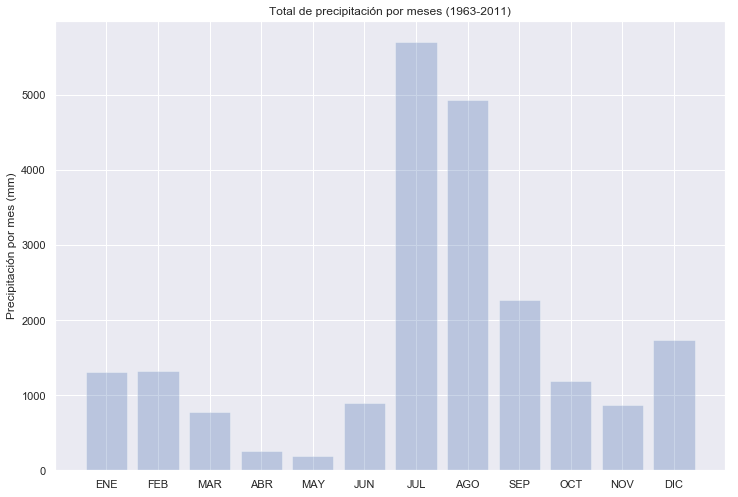

In [66]:
#Graficamos el promedio de precipitación de cada mes:
meses = ('ENE','FEB','MAR','ABR','MAY','JUN','JUL','AGO','SEP','OCT','NOV','DIC')
#Para que la tabla abarque los valores de los promedio de las precipitaciones.
y_pos = np.arange(len(meses))
PreTot = [SP_ENE,SP_FEB,SP_MAR,SP_ABR,SP_MAY,SP_JUN,SP_JUL,SP_AGO,SP_SEP,SP_OCT,SP_NOV,SP_DIC]

#Para hacer la gráfica:
plt.bar(y_pos, PreTot,align='center', alpha=0.3)

#Poner los meses en el eje de las "x".
plt.xticks(y_pos, meses)
plt.ylabel('Precipitación por mes (mm)')
plt.title('Total de precipitación por meses (1963-2011)')
plt.savefig('RainMeses',plt=2000)
plt.show()

In [67]:
#Por lo tanto, podemos observar que el mes con más precipitaciones 
#es el mes de Julio.

In [68]:
#Para calcular los meses más fríos, sacamos un promedio de las temperaturas mínimas de cada mes.
TMIN_ENE = df0_ENE.TMIN.mean()
print("Tmin Enero = ",TMIN_ENE)
TMIN_FEB = df0_FEB.TMIN.mean()
print("Tmin Febrero = ",TMIN_FEB)
TMIN_MAR = df0_MAR.TMIN.mean()
print("Tmin Marzo = ",TMIN_MAR)
TMIN_ABR = df0_ABR.TMIN.mean()
print("Tmin Abril = ",TMIN_ABR)
TMIN_MAY = df0_MAY.TMIN.mean()
print("Tmin Mayo = ",TMIN_MAY)
TMIN_JUN = df0_JUN.TMIN.mean()
print("Tmin Junio = ",TMIN_JUN)
TMIN_JUL = df0_JUL.TMIN.mean()
print("Tmin Julio = ",TMIN_JUL)
TMIN_AGO = df0_AGO.TMIN.mean()
print("Tmin Agosto = ",TMIN_AGO)
TMIN_SEP = df0_SEP.TMIN.mean()
print("Tmin Septiembre = ",TMIN_SEP)
TMIN_OCT = df0_OCT.TMIN.mean()
print("Tmin Octubre = ",TMIN_OCT)
TMIN_NOV = df0_NOV.TMIN.mean()
print("Tmin Noviembre = ",TMIN_NOV)
TMIN_DIC = df0_DIC.TMIN.mean()
print("Tmin Diciembre = ",TMIN_DIC)

Tmin Enero =  2.4214119472459283
Tmin Febrero =  3.8158703071672346
Tmin Marzo =  6.042069992553983
Tmin Abril =  8.854100827689988
Tmin Mayo =  13.9357597173145
Tmin Junio =  19.40523636363638
Tmin Julio =  20.943019135365002
Tmin Agosto =  19.851898734177233
Tmin Septiembre =  17.945558086560375
Tmin Octubre =  12.004747320061254
Tmin Noviembre =  5.7425971877584745
Tmin Diciembre =  3.1308493589743596


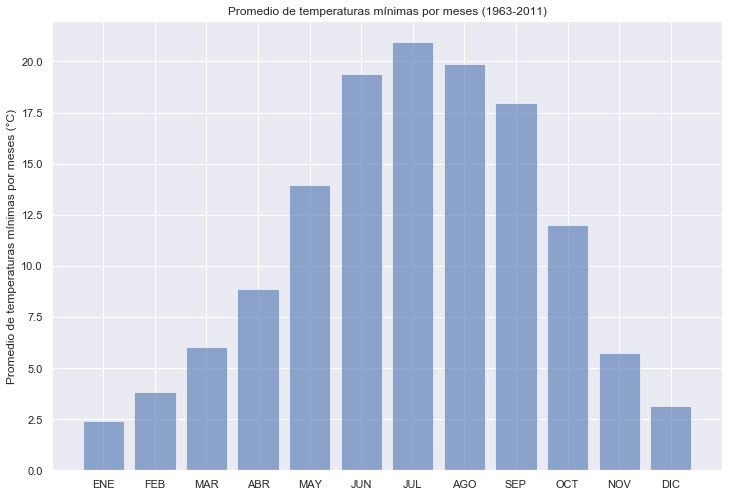

In [69]:
#Graficamos las temperaturas mínimas promedio con respecto a los meses.
meses = ('ENE','FEB','MAR','ABR','MAY','JUN','JUL','AGO','SEP','OCT','NOV','DIC')
#Para que la tabla abarque los valores de los promedio de las precipitaciones.
y_pos = np.arange(len(meses))
TminT = [TMIN_ENE,TMIN_FEB,TMIN_MAR,TMIN_ABR,TMIN_MAY,TMIN_JUN,TMIN_JUL,TMIN_AGO,TMIN_SEP,TMIN_OCT,TMIN_NOV,TMIN_DIC]

#Para hacer la gráfica:
plt.bar(y_pos, TminT,align='center', alpha=0.6)

#Poner los meses en el eje de las "x".
plt.xticks(y_pos, meses)
plt.ylabel('Promedio de temperaturas mínimas por meses (°C)')
plt.title('Promedio de temperaturas mínimas por meses (1963-2011)')
plt.savefig('TempMinMeses',plt=2000)
plt.show()


In [70]:
#Podemos observar que el mes con las temperaturas más bajas en promedio es Enero
#con una temperatura media de alrededor de 2.5°C.

In [71]:
#Para calcular los meses más cálidos, sacamos un promedio de las temperaturas máximas de cada mes.
TMAX_ENE = df0_ENE.TMAX.mean()
print("Tmáx Enero = ",TMAX_ENE)
TMAX_FEB = df0_FEB.TMAX.mean()
print("Tmáx Febrero = ",TMAX_FEB)
TMAX_MAR = df0_MAR.TMAX.mean()
print("Tmáx Marzo = ",TMAX_MAR)
TMAX_ABR = df0_ABR.TMAX.mean()
print("Tmáx Abril = ",TMAX_ABR)
TMAX_MAY = df0_MAY.TMAX.mean()
print("Tmáx Mayo = ",TMAX_MAY)
TMAX_JUN = df0_JUN.TMAX.mean()
print("Tmáx Junio = ",TMAX_JUN)
TMAX_JUL = df0_JUL.TMAX.mean()
print("Tmáx Julio = ",TMAX_JUL)
TMAX_AGO = df0_AGO.TMAX.mean()
print("Tmáx Agosto = ",TMAX_AGO)
TMAX_SEP = df0_SEP.TMAX.mean()
print("Tmáx Septiembre = ",TMAX_SEP)
TMAX_OCT = df0_OCT.TMAX.mean()
print("Tmáx Octubre = ",TMAX_OCT)
TMAX_NOV = df0_NOV.TMAX.mean()
print("Tmáx Noviembre = ",TMAX_NOV)
TMAX_DIC = df0_DIC.TMAX.mean()
print("Tmáx Diciembre = ",TMAX_DIC)

Tmáx Enero =  21.33883720930234
Tmáx Febrero =  23.220051194539263
Tmáx Marzo =  26.311549925484368
Tmáx Abril =  30.1589917231001
Tmáx Mayo =  35.011244695898185
Tmáx Junio =  38.95873362445417
Tmáx Julio =  36.791483321504636
Tmáx Agosto =  35.28667136812414
Tmáx Septiembre =  34.97819148936172
Tmáx Octubre =  31.43491577335376
Tmáx Noviembre =  26.214876033057863
Tmáx Diciembre =  21.495749799518862


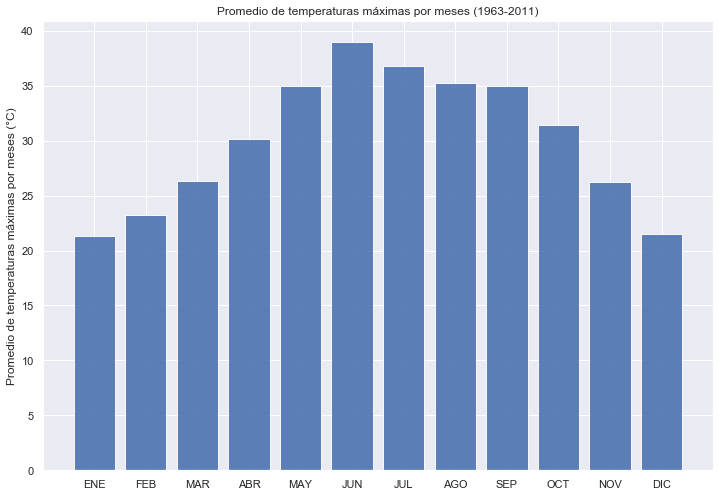

In [72]:
#Graficamos las temperaturas mínimas promedio con respecto a los meses.
meses = ('ENE','FEB','MAR','ABR','MAY','JUN','JUL','AGO','SEP','OCT','NOV','DIC')
#Para que la tabla abarque los valores de los promedio de las precipitaciones.
y_pos = np.arange(len(meses))
TmaxT = [TMAX_ENE,TMAX_FEB,TMAX_MAR,TMAX_ABR,TMAX_MAY,TMAX_JUN,TMAX_JUL,TMAX_AGO,TMAX_SEP,TMAX_OCT,TMAX_NOV,TMAX_DIC]

#Para hacer la gráfica:
plt.bar(y_pos, TmaxT,align='center', alpha=0.9)

#Poner los meses en el eje de las "x".
plt.xticks(y_pos, meses)
plt.ylabel('Promedio de temperaturas máximas por meses (°C)')
plt.title('Promedio de temperaturas máximas por meses (1963-2011)')
plt.savefig('TampMaxMeses',plt=2000)
plt.show()

In [73]:
#Se puede observar entonves que Junio es el mes más cálido con una temperatura
#promedio máxima de alrededor de 40°C. 

In [74]:
#Para calcular cuáles han sido los años más húmedos, nos basamos en la suma de precipitaciones por año
#Creamos un arreglo con los años y con la precipitación total por año
#inicio es el año donde empezamos a contar, en un rango de 48 años hasta el 2011.
#YEAR es el arreglo con los 48 años.
#PYEAR es el arreglo con la suma de precipitaciones por año de los 48 años.
inicio = 1963
YEAR = [inicio + i for i in range(0, 49)]
PYEAR = [ df0[df0.AÑO==(inicio + i)].PRECIP.sum() for i in range(0, 49)]


In [75]:
#Creamos un nuevo Data Frame para los años y las precipitaciones totales.
d0 = {'AÑO': YEAR, 'PRECIPITACIÓN TOTAL': PYEAR}
df1 = pd.DataFrame(data=d0)
df1.head()

,AÑO,PRECIPITACIÓN TOTAL
0,1963,30.9
1,1964,575.5
2,1965,601.5
3,1966,478.0
4,1967,580.0


In [76]:
df1.tail()

,AÑO,PRECIPITACIÓN TOTAL
44,2007,722.5
45,2008,357.5
46,2009,441.8
47,2010,537.0
48,2011,126.3


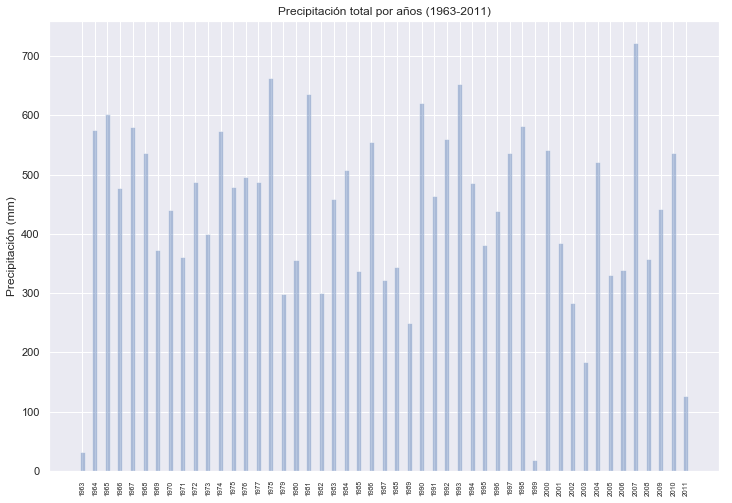

In [77]:
#Graficamos las precipitaciones totales por año.
date = YEAR
T = np.arange(len(date))
Rain = PYEAR

plt.bar(T, Rain, width=0.4, align='center', alpha=0.4)
plt.xticks(T, date, size='xx-small', rotation=90)
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación total por años (1963-2011)')
plt.show()

In [78]:
#De la tabla se puede concluir que el año más húmedo es el de 2007.
#Y de igual manera podemos concluir que el año más seco fue el menos
#lluvioso, en este caso, en 1999.

In [79]:
#Seleccionamos las temperaturas máximas y mínimas de los meses de invierno (diciembre, enero y febrero)
TEMPINV = pd.DataFrame(df0.loc[df0['MES'].isin([12,1,2])])
TEMPINV.head()


,PRECIP,EVAP,TMAX,TMIN,FECHA,MES,AÑO
30,0.0,4.3,24.0,6.0,1963-12-01,12,1963
31,0.0,4.3,24.0,4.0,1963-12-02,12,1963
32,0.0,2.7,24.0,6.0,1963-12-03,12,1963
33,0.0,2.5,25.0,4.0,1963-12-04,12,1963
34,0.0,3.1,20.0,6.0,1963-12-05,12,1963


In [80]:
#Creamos arreglos para la temperatura promedio máxima y mínima de cada año
#Winter Max
WMAX = [TEMPINV[TEMPINV.AÑO==(inicio + i)].TMAX.mean() for i in range(0,49)]
WMIN = [TEMPINV[TEMPINV.AÑO==(inicio + i)].TMIN.mean() for i in range(0,49)]


In [81]:
#Creamos otro DataFrame para las temperaturas promedio por año
d3 = {'AÑO': YEAR, 'TMAXI': WMAX, 'TMINI': WMIN }
df3 = pd.DataFrame(data=d3)
df3


,AÑO,TMAXI,TMINI
0,1963,21.435484,2.483871
1,1964,21.423077,1.153846
2,1965,20.544444,3.577778
3,1966,19.727778,1.077778
4,1967,21.672222,2.544444
5,1968,21.043956,3.203297
6,1969,21.244444,4.488764
7,1970,22.755556,3.077778
8,1971,20.817778,1.977778
9,1972,22.801099,3.793407


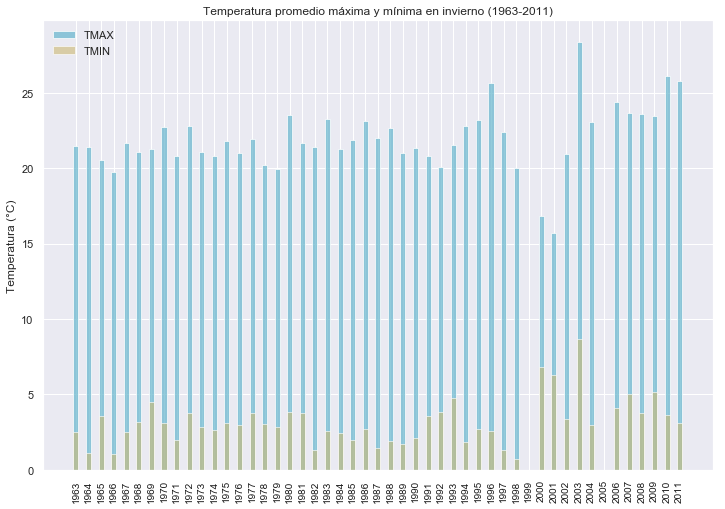

In [82]:
#Creamos gráficas para la temperatura promedio máxima y mínima en invierno por cada año.
N = np.arange(len(date))

plt.bar(N,WMAX,width=0.4,align='center',alpha=0.7,color='C')
plt.xticks(N,YEAR,size='small',color='c',rotation=90)

plt.bar(N,WMIN,width=0.4,align='center',alpha=0.6,color='y')
plt.xticks(N,YEAR,size='small',color='k',rotation=90)

plt.ylabel('Temperatura (°C)')
plt.title('Temperatura promedio máxima y mínima en invierno (1963-2011)')
plt.gca().legend(('TMAX','TMIN'),frameon=False,loc='upper left')
plt.savefig('Temperaturasprom_invierno',plt=2000)
plt.show()

In [83]:
#Temperatura mínima de las temperaturas máximas.
min=df3.TMINI.idxmin()
df3.iloc[[min]]

,AÑO,TMAXI,TMINI
35,1998,20.035714,0.714286


In [84]:
#5 temperaturas mínimas
df3.nsmallest(5,'TMINI',keep='first')

,AÑO,TMAXI,TMINI
35,1998,20.035714,0.714286
3,1966,19.727778,1.077778
1,1964,21.423077,1.153846
34,1997,22.423729,1.296610
19,1982,21.433333,1.333333


In [85]:
df3.nsmallest(5,'TMAXI',keep='first')

,AÑO,TMAXI,TMINI
38,2001,15.733333,6.297297
37,2000,16.800000,6.804762
3,1966,19.727778,1.077778
16,1979,19.950000,2.838889
35,1998,20.035714,0.714286


In [86]:
df3.iloc[[35]]

,AÑO,TMAXI,TMINI
35,1998,20.035714,0.714286


In [87]:
#Seleccionamos las temperaturas máximas y mínimas en los meses de verano (Junio, Julio, Agosto, Septiembre)
TV = pd.DataFrame(df0.loc[df0['MES'].isin([6,7,8,9])])
TV.head()

,PRECIP,EVAP,TMAX,TMIN,FECHA,MES,AÑO
213,0.0,12.1,38.0,19.0,1964-06-01,6,1964
214,0.0,11.4,39.0,19.0,1964-06-02,6,1964
215,0.0,10.1,37.0,22.0,1964-06-03,6,1964
216,0.0,11.7,38.0,18.0,1964-06-04,6,1964
217,0.0,12.5,40.0,19.0,1964-06-05,6,1964


In [88]:
#Creamos arreglos de las temperaturas promedio máximas y mínimas de verano de cada año.
SMAX = [TV[TV.AÑO==(inicio + i)].TMAX.mean() for i in range(0,49)]
SMIN = [TV[TV.AÑO==(inicio + i)].TMIN.mean() for i in range(0,49)]


In [89]:
#Creamos un Dataframe para las temperaturas promedio en verano por cada año.
d4 = {'AÑO': YEAR, 'TVMAX': SMAX, 'TVMIN': SMIN }
df4 = pd.DataFrame(data=d4)
df4


,AÑO,TVMAX,TVMIN
0,1963,NaN,NaN
1,1964,35.930328,19.922131
2,1965,36.549180,20.049180
3,1966,35.893443,19.983607
4,1967,35.770492,19.651639
5,1968,34.758197,18.659836
6,1969,36.852459,19.636364
7,1970,35.155738,20.139344
8,1971,34.586885,18.512295
9,1972,35.412069,19.799138


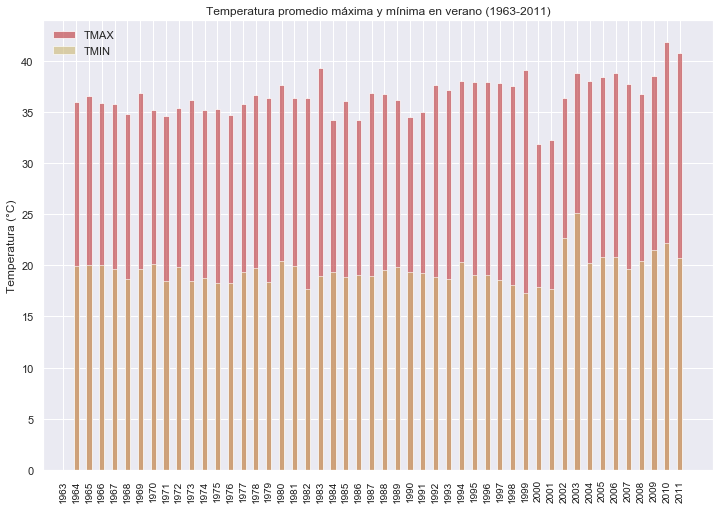

In [90]:
#Creamos gráficas para la temperatura promedio máxima y mínima en invierno por cada año.
N = np.arange(len(date))

plt.bar(N,SMAX,width=0.4,align='center',alpha=0.7,color='R')
plt.xticks(N,YEAR,size='small',color='c',rotation=90)

plt.bar(N,SMIN,width=0.4,align='center',alpha=0.6,color='Y')
plt.xticks(N,YEAR,size='small',color='k',rotation=90)

plt.ylabel('Temperatura (°C)')
plt.title('Temperatura promedio máxima y mínima en verano (1963-2011)')
plt.gca().legend(('TMAX','TMIN'),frameon=False,loc='upper left')
plt.savefig('Temperaturasprom_verano',plt=2000)
plt.show()


In [91]:
#Temperaturas mínimas de verano
df4.nlargest(5,'TVMAX', keep='first')

,AÑO,TVMAX,TVMIN
47,2010,41.851240,22.198347
48,2011,40.783333,20.688525
20,1983,39.274590,18.922131
36,1999,39.116667,17.333333
43,2006,38.802198,20.815217


In [92]:
#Temperatura mensual promedio
inicio = 1963
YEAR = [inicio + i for i in range(0,49)]
TMAXAÑO = [df0[df0.AÑO==(inicio + i)].TMAX.mean() for i in range(0,49)]
TMINAÑO = [df0[df0.AÑO==(inicio + i)].TMIN.mean() for i in range(0,49)]


In [93]:
#Creamos el DataFrame para la temperatura promedio máxima y mínima anual.
d5 = {'AÑO': YEAR, 'TMAXA': TMAXAÑO, 'TMINA': TMINAÑO }
df5 = pd.DataFrame(data=d5)
df5


,AÑO,TMAXA,TMINA
0,1963,23.565574,4.508197
1,1964,29.542350,10.513661
2,1965,29.917808,11.280220
3,1966,29.582192,10.856164
4,1967,30.164384,11.530137
5,1968,28.491803,10.271858
6,1969,30.036986,12.285515
7,1970,29.452329,11.849315
8,1971,28.809315,11.005479
9,1972,29.666389,11.898889


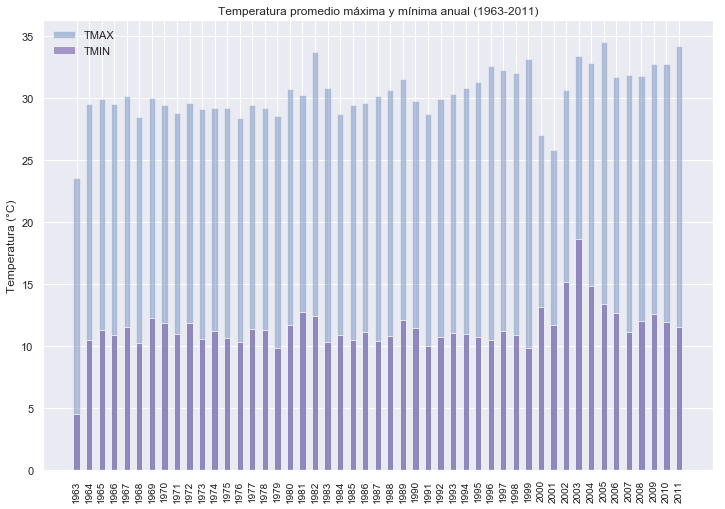

In [94]:
#Creando gráfica para temperatura promedio mínima y máxima por año
N = np.arange(len(YEAR)) 

plt.bar(N,TMAXAÑO, width=0.5, align='center', alpha=0.4,color='b')
plt.xticks(N, YEAR, size = 'small', color = 'r', rotation = 90)

plt.bar(N, TMINAÑO, width=0.5, align='center', alpha=0.7,color='m')
plt.xticks(N, YEAR, size = 'small', color = 'k', rotation = 90)

plt.ylabel('Temperatura (°C)')
plt.title('Temperatura promedio máxima y mínima anual (1963-2011)')
plt.gca().legend(('TMAX','TMIN'),frameon=False,loc='upper left')
plt.savefig('TempProm_anual',plt=2000)
plt.show()

In [95]:
#Se puede deducir que en los últimos 20 años de datos (desde 1991) la temperatura promedio se ha
#mantenido un poco estable.

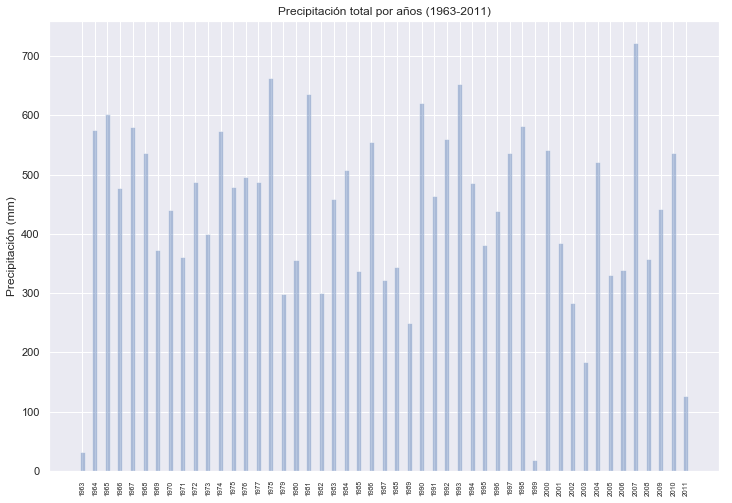

In [96]:
#Para ver qué ha suciedido con las precipitaciones en los últimos 20 años
#observaremos de nuevo la tabla que se realizó previamente:



#Graficamos las precipitaciones totales por año.
date = YEAR
T = np.arange(len(date))
Rain = PYEAR

plt.bar(T, Rain, width=0.4, align='center', alpha=0.4)
plt.xticks(T, date, size='xx-small', rotation=90)
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación total por años (1963-2011)')
plt.savefig('Lluvia_anual',plt=2000)
plt.show()

In [97]:
#En el municipio de Bacadehuachi, en los últimos 20 años de datos, las precipitaciones han ido
#fluctuando de manera significativa, teniendo años donde casi no llueve, y otros donde llueve
#de mas.

ACTIVIDAD 4

In [98]:
#Gráfica de barras de precipitación mensual acumulada promedio
#Hacemos el promedio de las precipitaciones.
#PP es el promedio de precipitación de cada mes.
PP_ENE = df0_ENE.PRECIP.mean()
print("Enero = ",PP_ENE)
PP_FEB = df0_FEB.PRECIP.mean()
print("Febrero = ",PP_FEB)
PP_MAR = df0_MAR.PRECIP.mean()
print("Marzo = ",PP_MAR)
PP_ABR = df0_ABR.PRECIP.mean()
print("Abril = ",PP_ABR)
PP_MAY = df0_MAY.PRECIP.mean()
print("Mayo = ",PP_MAY)
PP_JUN = df0_JUN.PRECIP.mean()
print("Junio = ",PP_JUN)
PP_JUL = df0_JUL.PRECIP.mean()
print("Julio = ",PP_JUL)
PP_AGO = df0_AGO.PRECIP.mean()
print("Agosto = ",PP_AGO)
PP_SEP = df0_SEP.PRECIP.mean()
print("Septiembre = ",PP_SEP)
PP_OCT = df0_OCT.PRECIP.mean()
print("Octubre = ",PP_OCT)
PP_NOV = df0_NOV.PRECIP.mean()
print("Noviembre = ",PP_NOV)
PP_DIC = df0_DIC.PRECIP.mean()
print("Diciembre = ",PP_DIC)

Enero =  0.988586545729403
Febrero =  1.1267461669505963
Marzo =  0.5716196136701338
Abril =  0.19548872180451127
Mayo =  0.1297887323943662
Junio =  0.6509077705156137
Julio =  3.926946933149552
Agosto =  3.466736990154712
Septiembre =  1.7152503793626706
Octubre =  0.9103658536585366
Noviembre =  0.7023387096774193
Diciembre =  1.358014073494918


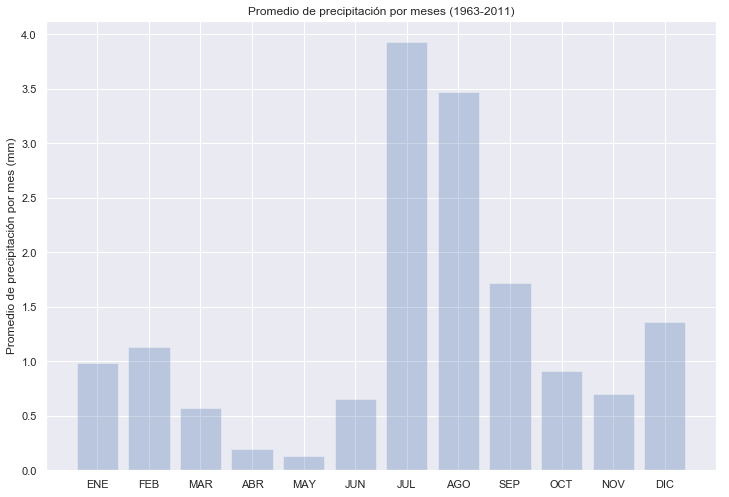

In [99]:
#Graficamos el promedio de precipitación de cada mes:
meses = ('ENE','FEB','MAR','ABR','MAY','JUN','JUL','AGO','SEP','OCT','NOV','DIC')
#Para que la tabla abarque los valores de los promedio de las precipitaciones.
y_pos = np.arange(len(meses))
PreTotProm = [PP_ENE,PP_FEB,PP_MAR,PP_ABR,PP_MAY,PP_JUN,PP_JUL,PP_AGO,PP_SEP,PP_OCT,PP_NOV,PP_DIC]

#Para hacer la gráfica:
plt.bar(y_pos, PreTotProm,align='center', alpha=0.3)

#Poner los meses en el eje de las "x".
plt.xticks(y_pos, meses)
plt.ylabel('Promedio de precipitación por mes (mm)')
plt.title('Promedio de precipitación por meses (1963-2011)')
plt.savefig('PromRainMeses',plt=2000)
plt.show()

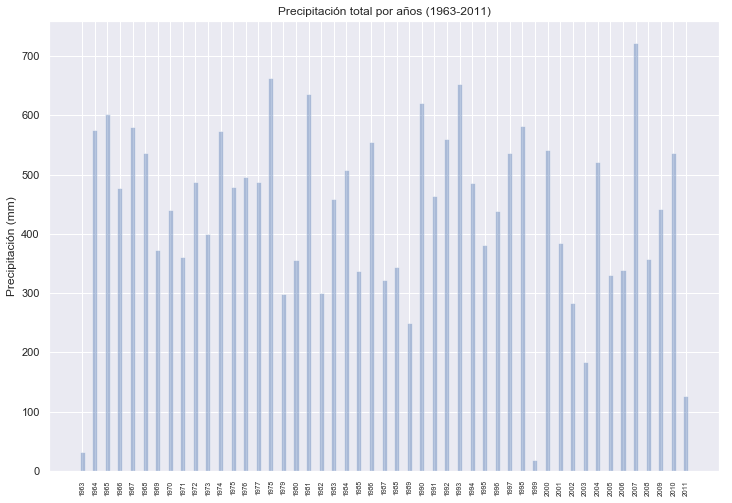

In [100]:
#Gráfica de barras de precipitación acumulada para cada año de la misma colección.  
#Dicha tabla se ovtuvo en la práctica pasada:
#Graficamos las precipitaciones totales por año.
date = YEAR
T = np.arange(len(date))
Rain = PYEAR

plt.bar(T, Rain, width=0.4, align='center', alpha=0.4)
plt.xticks(T, date, size='xx-small', rotation=90)
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación total por años (1963-2011)')
plt.savefig('Lluvia_anual',plt=2000)
plt.show()

In [101]:
df0.head()

,PRECIP,EVAP,TMAX,TMIN,FECHA,MES,AÑO
0,0.0,4.4,32.0,15.0,1963-11-01,11,1963
1,0.0,2.9,39.0,14.0,1963-11-02,11,1963
2,0.0,4.7,29.0,11.0,1963-11-03,11,1963
3,0.0,4.3,29.0,12.0,1963-11-04,11,1963
4,0.0,3.9,28.0,11.0,1963-11-05,11,1963


In [102]:
#Gráfica de la evolución de la temperatura máxima y mínima en la misma figura, como función del tiempo de la colección de datos

#inicio = 1963
#YEAR = [inicio + i for i in range(0,49)]
#TMAXAÑO = [df0[df0.AÑO==(inicio + i)].TMAX() for i in range(0,49)]
#TMINAÑO = [df0[df0.AÑO==(inicio + i)].TMIN() for i in range(0,49)]


#fig, ax = plt.subplots()
#x1 = TMAXAÑO
#x2 = TMINAÑO
#y = YEAR
#ax.plot(y, x1)

#Agregamos los datos de la temperatura mínima

#ax.plot(y,x2)

#ax.set(xlabel='Tiempo (años)', ylabel='Temperatura °C',
#       title='Gráfica de evolución de la Temperatura máxima y mínima')
#ax.grid()

#fig.savefig('Tmaxmin evolución',plt=2000)
#plt.show()

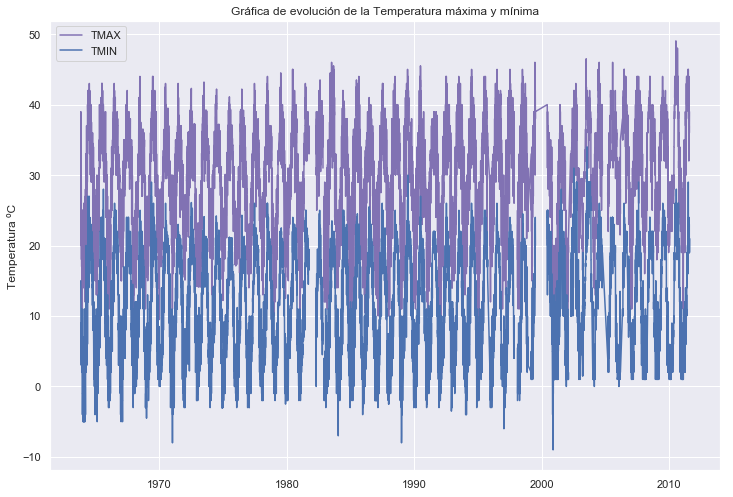

In [104]:
#Otra gráfica de la evolución de las temperaturas
plt.plot_date(x=df0.FECHA, y=df0.TMAX, fmt="m")
plt.plot_date(x=df0.FECHA, y=df0.TMIN, fmt="b-")
plt.legend(loc='best')
plt.title("Gráfica de evolución de la Temperatura máxima y mínima")
plt.ylabel("Temperatura ºC")
plt.grid(True)
plt.savefig('Tmaxmin1 evolución',plt=2000)
plt.show()

NameError: name 'ax' is not defined

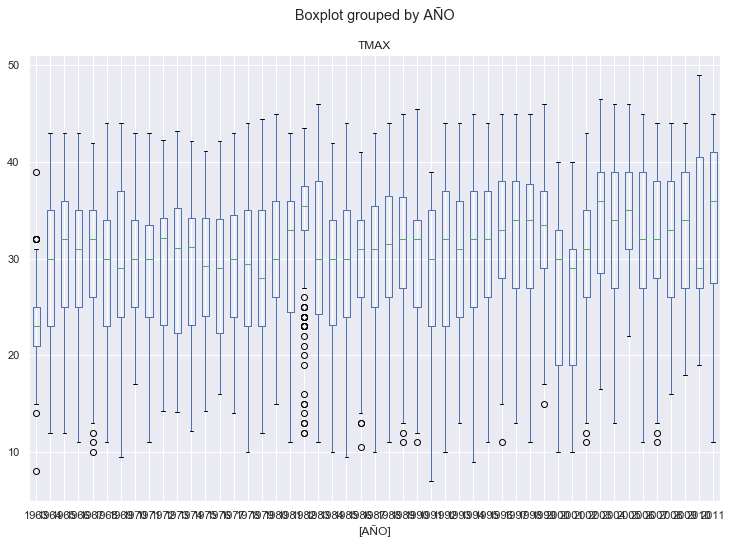

In [105]:
#Temperatura promedio mensual para la temperatura máxima y mínima por separado.
#meses = ('ENE','FEB','MAR','ABR','MAY','JUN','JUL','AGO','SEP','OCT','NOV','DIC')
#ax = sns.boxplot(x="AÑO", y="TMAX", data=df0)

df5 = pd.DataFrame({"AÑO" : df0.AÑO, "TMAX" : df0.TMAX})
df5.boxplot(by="AÑO")
ax.set_xticks(range(10))
ax.set_xtickslabels(range(10))
plt.title("Temperatura Máxima por año")
plt.savefig('Tmax',plt=2000)
plt.show()

NameError: name 'ax' is not defined

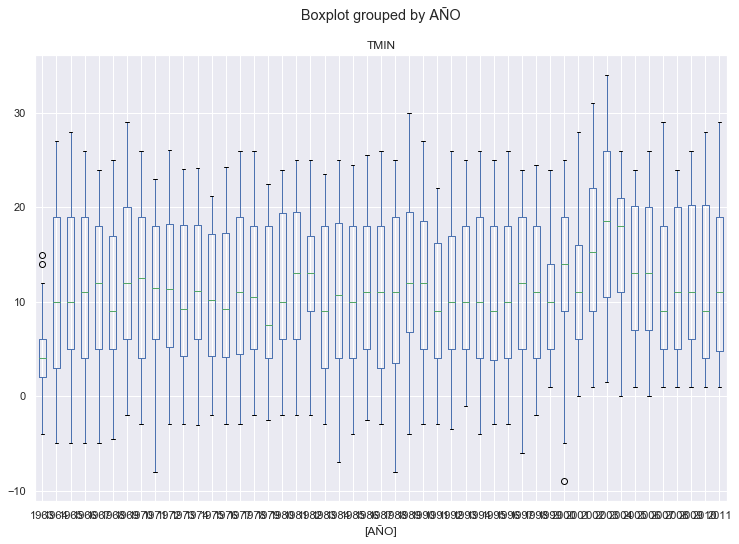

In [106]:
df6 = pd.DataFrame({"AÑO" : df0.AÑO, "TMIN" : df0.TMIN})
df6.boxplot(by="AÑO")
ax.set_xticks(range(10))
ax.set_xtickslabels(range(10))
plt.title("Temperatura Mínima por año")
plt.savefig('Tmin',plt=2000)
plt.show()

In [ ]:
#Checar este link https://matplotlib.org/gallery/statistics/boxplot_color.html#sphx-glr-gallery-statistics-boxplot-color-py